In [36]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor

In [3]:
cardio_raw = pd.read_csv('Dataset\cardio.csv')
cardio_raw.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,4,48,F,156,56.0,23.0,100,60,N,N,0,0,0,0


# -----------Enter our problem definition based on dataset---------

In [4]:
print("Data type : ", type(cardio_raw))
print("Data dims : ", cardio_raw.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 14)


In [5]:
cardio_raw.describe() 

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,164.359229,74.205690,27.555604,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,8.210126,14.395757,6.092759,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,55.000000,10.000000,3.500000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,159.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,165.000000,72.000000,26.400000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,170.000000,82.000000,30.200000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,250.000000,200.000000,298.700000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cardio_raw.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003050,-0.003038,-0.001830,-0.001364,0.003356,-0.002529,-0.003699,0.001210,0.003755,0.003799
Age,0.003050,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754,-0.047884,-0.029918,-0.009819,0.237749
Height,-0.003038,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150,0.187989,0.094419,-0.006570,-0.010821
Weight,-0.001830,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710,0.067780,0.067113,-0.016867,0.181660
BMI,-0.001364,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350,-0.027165,0.014396,-0.014271,0.165646
AP_HI,0.003356,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086,-0.000922,0.001408,-0.000033,0.054475
AP_LO,-0.002529,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000,0.005186,0.010601,0.004780,0.065719
Smoke,-0.003699,-0.047884,0.187989,0.067780,-0.027165,-0.000922,0.005186,1.000000,0.340094,0.025858,-0.015486
Alco,0.001210,-0.029918,0.094419,0.067113,0.014396,0.001408,0.010601,0.340094,1.000000,0.025476,-0.007330
Active,0.003755,-0.009819,-0.006570,-0.016867,-0.014271,-0.000033,0.004780,0.025858,0.025476,1.000000,-0.035653


In [7]:
cardio_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70000 non-null  int64  
 1   Age     70000 non-null  int64  
 2   Gender  70000 non-null  object 
 3   Height  70000 non-null  int64  
 4   Weight  70000 non-null  float64
 5   BMI     70000 non-null  float64
 6   AP_HI   70000 non-null  int64  
 7   AP_LO   70000 non-null  int64  
 8   Chol    70000 non-null  object 
 9   Gluc    70000 non-null  object 
 10  Smoke   70000 non-null  int64  
 11  Alco    70000 non-null  int64  
 12  Active  70000 non-null  int64  
 13  Cardio  70000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.5+ MB


## Numerical variables EDA and Visualization ( Before cleaning )

In [9]:
# get all numeric data
num_DF = pd.DataFrame(cardio_raw[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
num_DF.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
4,48,156,56.0,23.0,100,60


In [10]:
num_DF.describe()

,Age,Height,Weight,BMI,AP_HI,AP_LO
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,27.555604,128.817286,96.630414
std,6.765294,8.210126,14.395757,6.092759,154.011419,188.472530
min,30.000000,55.000000,10.000000,3.500000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,23.900000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,26.400000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,30.200000,140.000000,90.000000
max,65.000000,250.000000,200.000000,298.700000,16020.000000,11000.000000


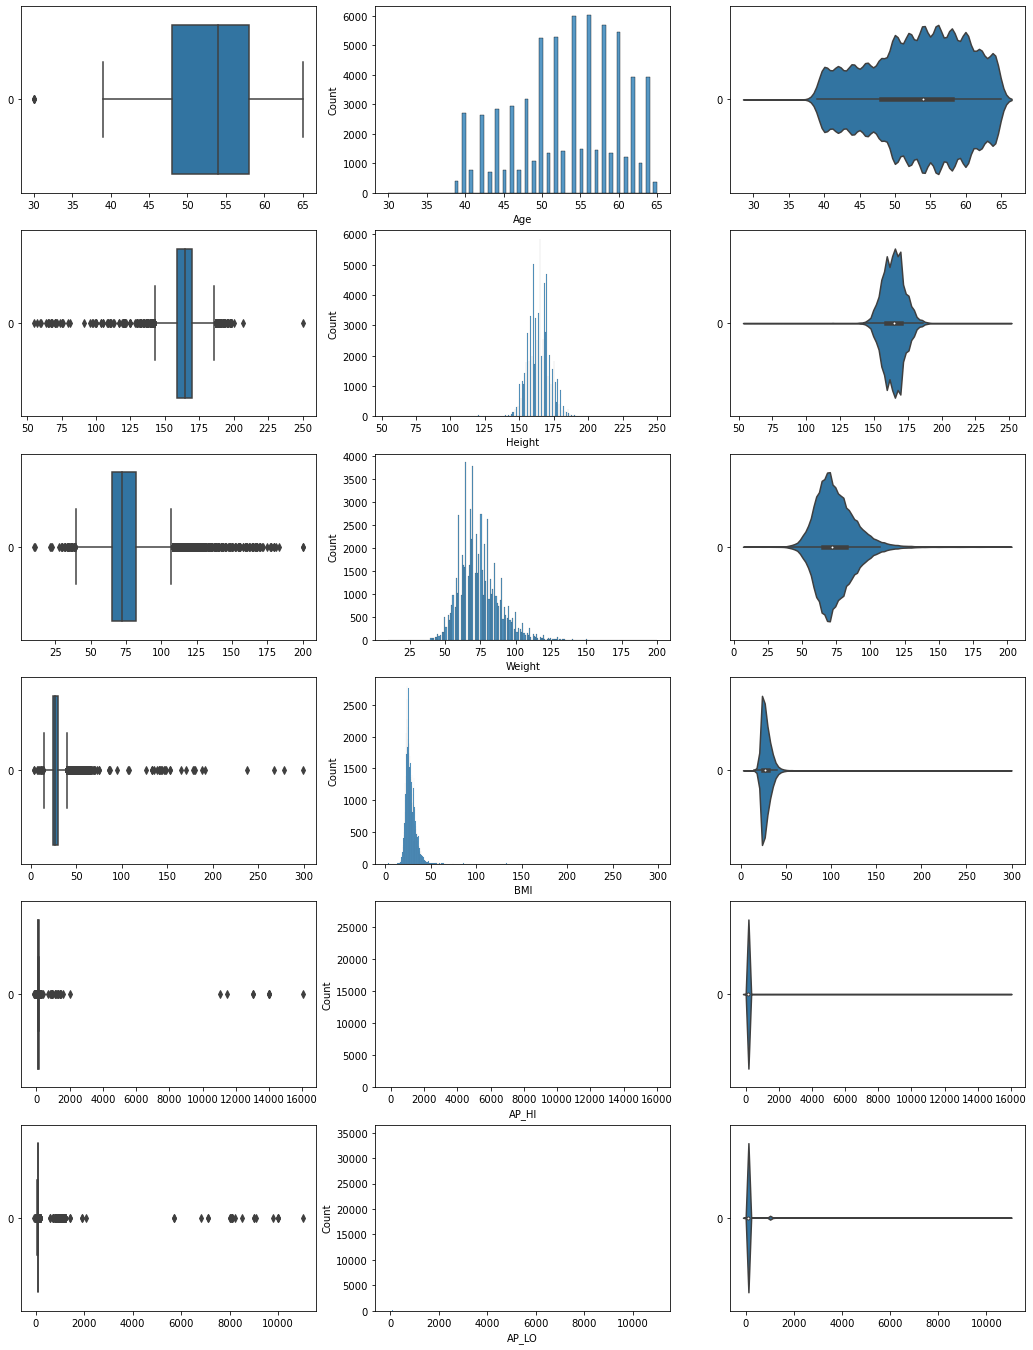

In [11]:
#visualization before data cleaning
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

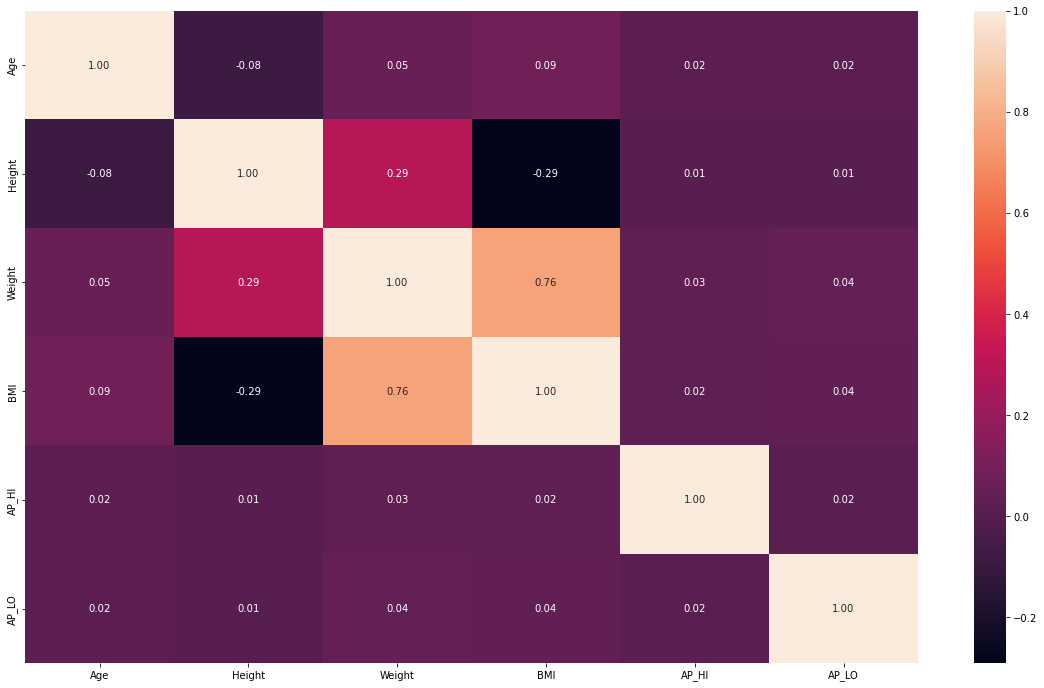

In [12]:
f = plt.figure(figsize=(20, 12))
sb.heatmap(num_DF.corr(), annot = True, fmt = ".2f")

In [13]:
num_DF.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO
Age,1.000000,-0.081456,0.053661,0.085423,0.020793,0.017754
Height,-0.081456,1.000000,0.290968,-0.290363,0.005488,0.006150
Weight,0.053661,0.290968,1.000000,0.762151,0.030702,0.043710
BMI,0.085423,-0.290363,0.762151,1.000000,0.024861,0.035350
AP_HI,0.020793,0.005488,0.030702,0.024861,1.000000,0.016086
AP_LO,0.017754,0.006150,0.043710,0.035350,0.016086,1.000000


In [14]:
num_DF.skew()

Age       -0.306444
Height    -0.642187
Weight     1.012070
BMI        7.725821
AP_HI     85.296214
AP_LO     32.114083
dtype: float64

## Categorical variables EDA and Visualization ( Before cleaning )

In [15]:
# categorical columns
cat_DF = pd.DataFrame(cardio_raw[['Gender', 'Chol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio']])
cat_DF.head()

,Gender,Chol,Gluc,Smoke,Alco,Active,Cardio
0,M,N,N,0,0,1,0
1,F,H,N,0,0,1,1
2,F,H,N,0,0,0,1
3,M,N,N,0,0,1,1
4,F,N,N,0,0,0,0


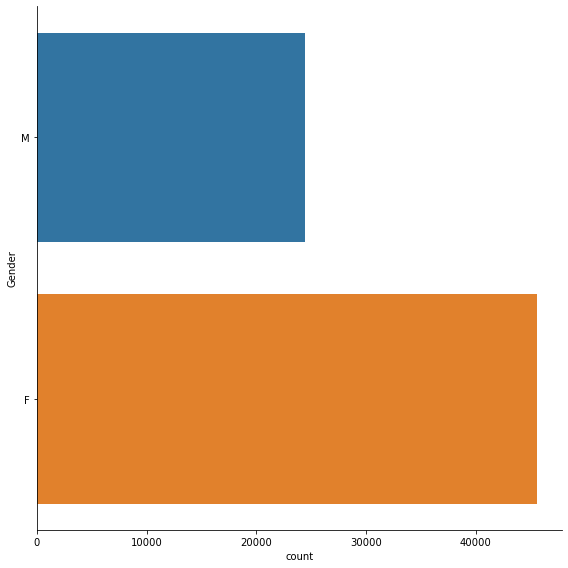

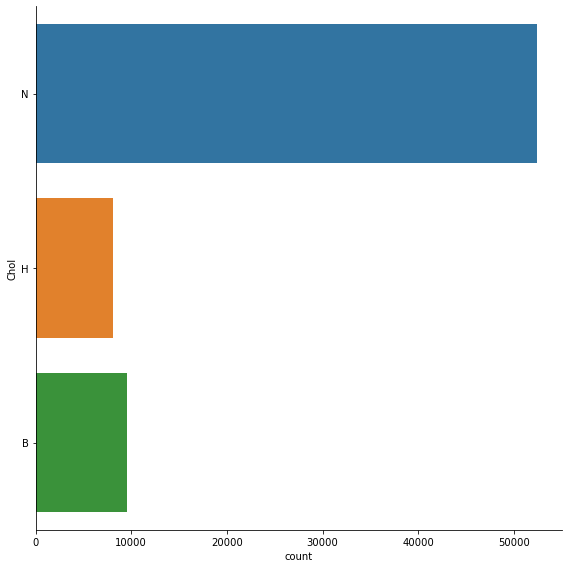

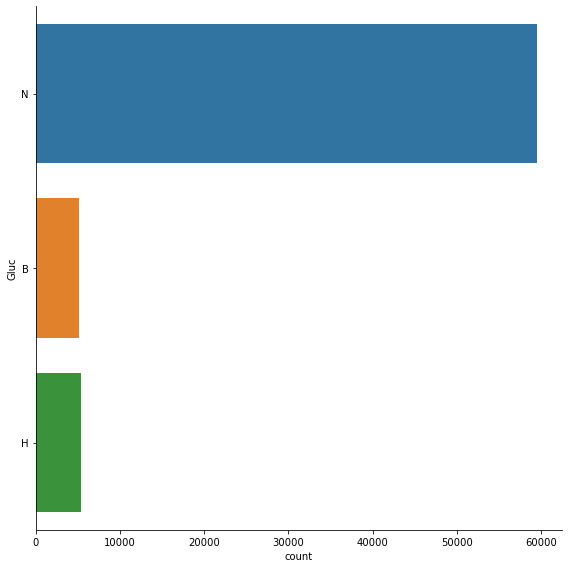

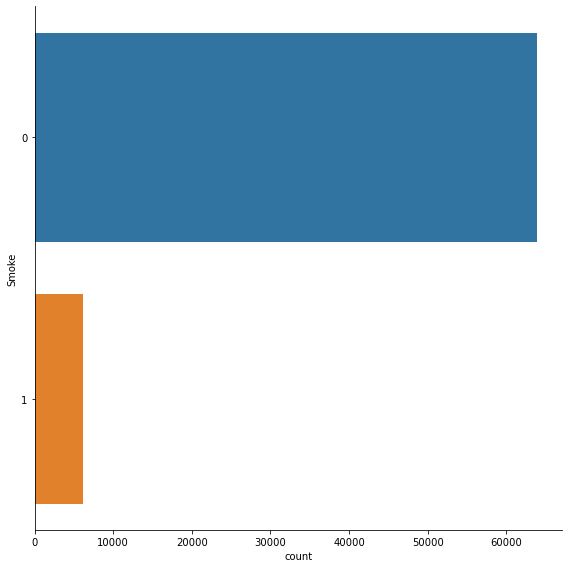

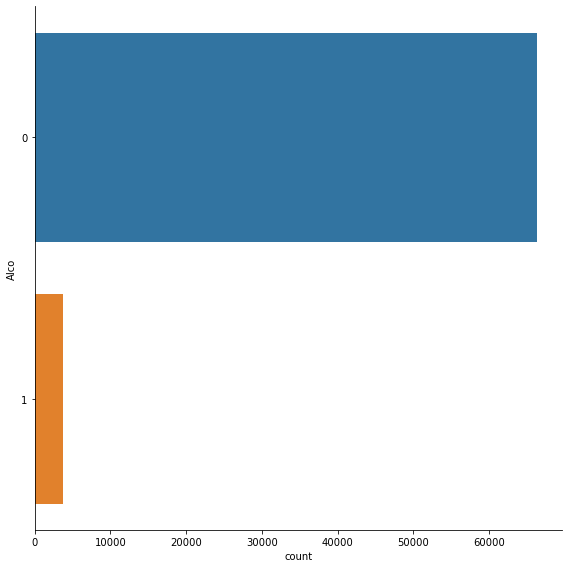

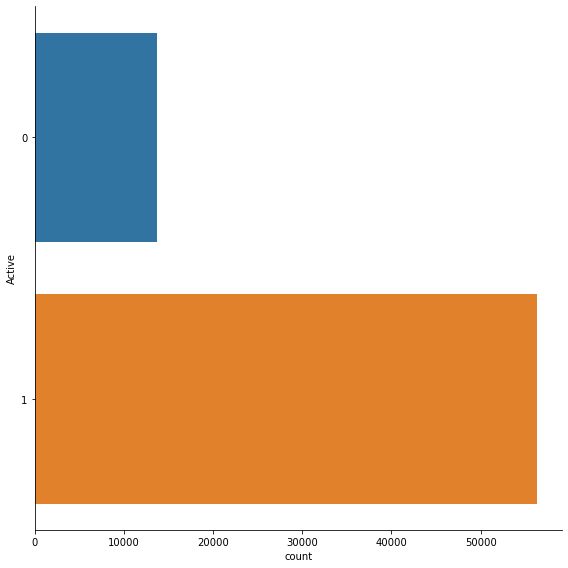

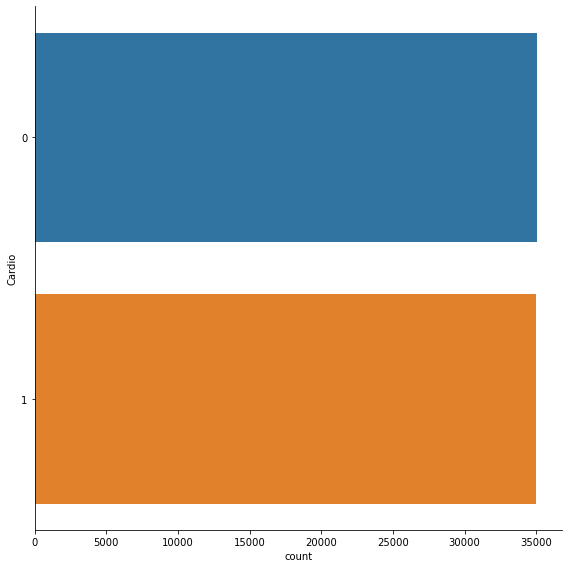

In [16]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

In [17]:
#change categorical to numeric

cat_DF['Chol']=cat_DF['Chol'].replace(['N','B','H'],[0,1,2]) 
cat_DF['Gluc']=cat_DF['Gluc'].replace(['N','B','H'],[0,1,2])
cat_DF['Gender']=cat_DF['Gender'].replace(['M','F'],[0,1])

<AxesSubplot:>

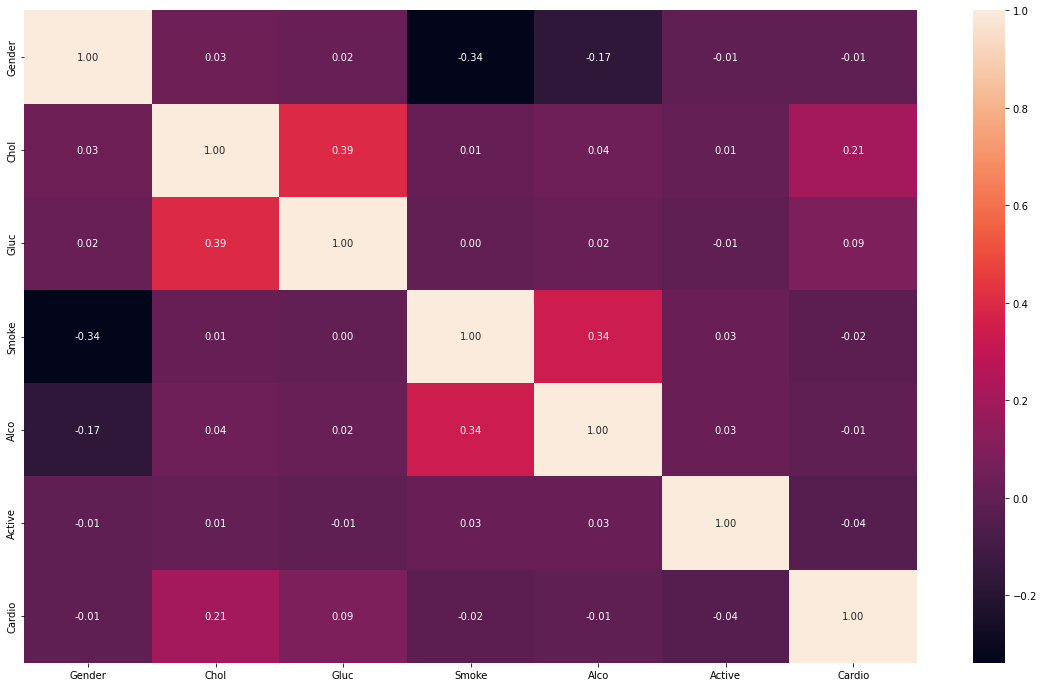

In [18]:
# using phi coefficient ( for categorical variables )
#heatmap for kendall corr for categorical 
variablesf = mp.pyplot.figure(figsize=(20, 12))
sb.heatmap(cat_DF.corr(method='kendall'), annot = True, fmt = ".2f")

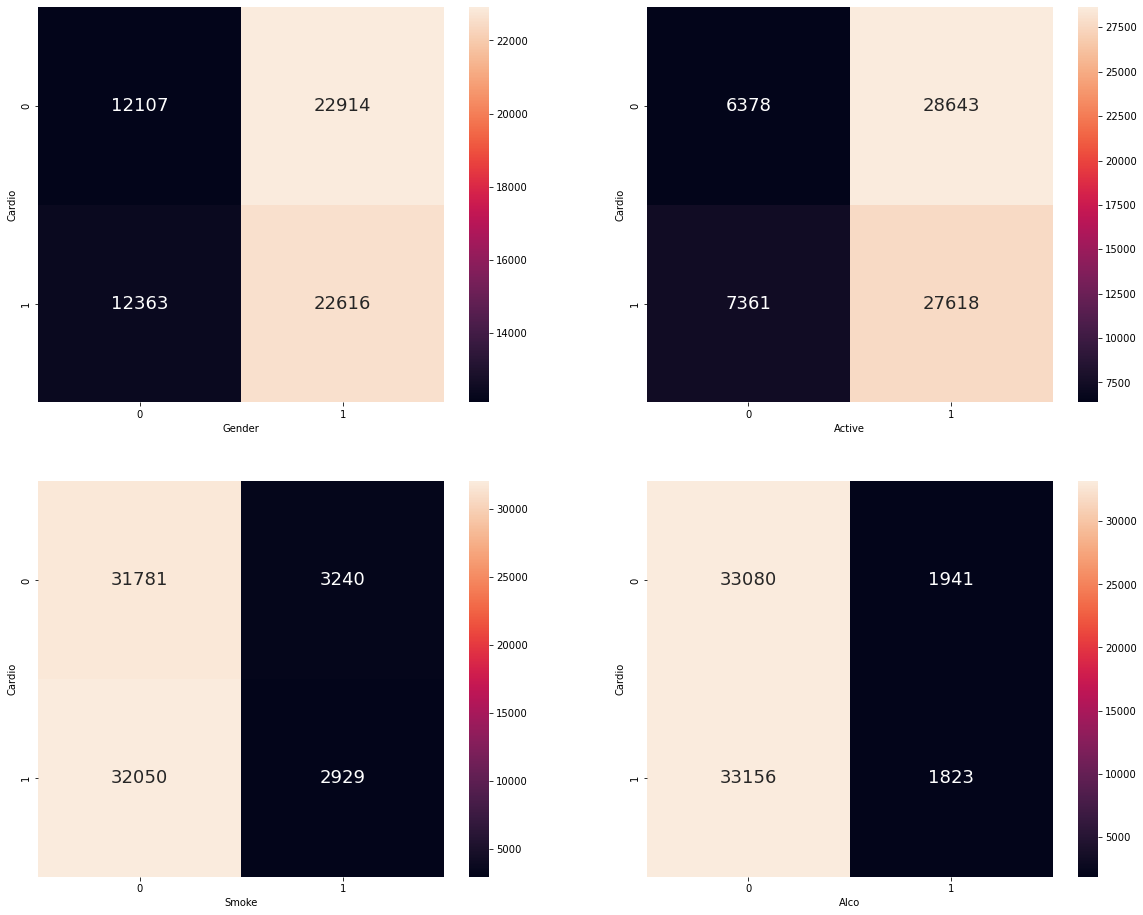

In [21]:
# looking at the binary variables distribution
f, axes = mp.pyplot.subplots(2, 2, figsize=(20, 16), )

cm_gender = confusion_matrix(cat_DF["Cardio"], cat_DF["Gender"])
cm_smoke = confusion_matrix(cat_DF["Cardio"], cat_DF["Smoke"])
cm_alco = confusion_matrix(cat_DF["Cardio"], cat_DF["Alco"])
cm_active = confusion_matrix(cat_DF["Cardio"], cat_DF["Active"])

sb.heatmap(cm_gender, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_active, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_smoke, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_alco, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])

count = 0
for ax in axes.flat:
    ax.set(ylabel = 'Cardio')
    if count == 0:
        ax.set(xlabel = 'Gender')
    elif count == 1:
        ax.set(xlabel = 'Active')
    elif count == 2:
        ax.set(xlabel = 'Smoke')
    elif count == 3:
        ax.set(xlabel = 'Alco')   
    count+=1

In [26]:
print("Percentage of Male with Cardio disease: ", round(100 * cm_gender[1][0]/(cm_gender[0][0] + cm_gender[1][0]),1))
print("Percentage of Female with Cardio disease: ", round(100 * cm_gender[1][1]/(cm_gender[0][1] + cm_gender[1][1]),1))
print()
print("Percentage of non-Active with Cardio disease: ", round(100 * cm_active[1][0]/(cm_active[0][0] + cm_active[1][0]),1))
print("Percentage of Active with Cardio disease: ", round(100 * cm_active[1][1]/(cm_active[0][1] + cm_active[1][1]),1))
print()
print("Percentage of non-Smoker with Cardio disease: ", round(100 * cm_smoke[1][0]/(cm_smoke[0][0] + cm_smoke[1][0]),1))
print("Percentage of Smoker with Cardio disease: ", round(100 * cm_smoke[1][1]/(cm_smoke[0][1] + cm_smoke[1][1]),1))
print()
print("Percentage of non-Alcohol with Cardio disease: ", round(100 * cm_alco[1][0]/(cm_alco[0][0] + cm_alco[1][0]),1))
print("Percentage of Alcohol with Cardio disease: ", round(100 * cm_alco[1][1]/(cm_alco[0][1] + cm_alco[1][1]),1))

Percentage of Male with Cardio disease:  50.5
Percentage of Female with Cardio disease:  49.7

Percentage of non-Active with Cardio disease:  53.6
Percentage of Active with Cardio disease:  49.1

Percentage of non-Smoker with Cardio disease:  50.2
Percentage of Smoker with Cardio disease:  47.5

Percentage of non-Alcohol with Cardio disease:  50.1
Percentage of Alcohol with Cardio disease:  48.4


#  Using Box-Whisker to detect and remove outliers.

In [28]:
# function to remove outliers in box-plot
def remove_boxliers(df, li):
    
    dup = df
    q_low = []
    q_high = []
    
    for i in li:
        q1 = dup[i].quantile(0.25)
        q3 = dup[i].quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr
        q_low.append(low_lim)
        q_high.append(upp_lim)
    
    n = 0
    for i in li:
        df = df[ (df[i] > q_low[n]) & (df[i] < q_high[n]) ]
        n += 1
        
    return df

In [29]:
cardio_clean = remove_boxliers(cardio_raw, ['BMI', 'AP_LO', 'AP_HI'])
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      61979 non-null  int64  
 1   Age     61979 non-null  int64  
 2   Gender  61979 non-null  object 
 3   Height  61979 non-null  int64  
 4   Weight  61979 non-null  float64
 5   BMI     61979 non-null  float64
 6   AP_HI   61979 non-null  int64  
 7   AP_LO   61979 non-null  int64  
 8   Chol    61979 non-null  object 
 9   Gluc    61979 non-null  object 
 10  Smoke   61979 non-null  int64  
 11  Alco    61979 non-null  int64  
 12  Active  61979 non-null  int64  
 13  Cardio  61979 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.1+ MB


In [30]:
num_DF = cardio_clean[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']]
num_DF.info()
print()
num_DF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     61979 non-null  int64  
 1   Height  61979 non-null  int64  
 2   Weight  61979 non-null  float64
 3   BMI     61979 non-null  float64
 4   AP_HI   61979 non-null  int64  
 5   AP_LO   61979 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 3.3 MB



,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
5,60,151,67.0,29.4,120,80


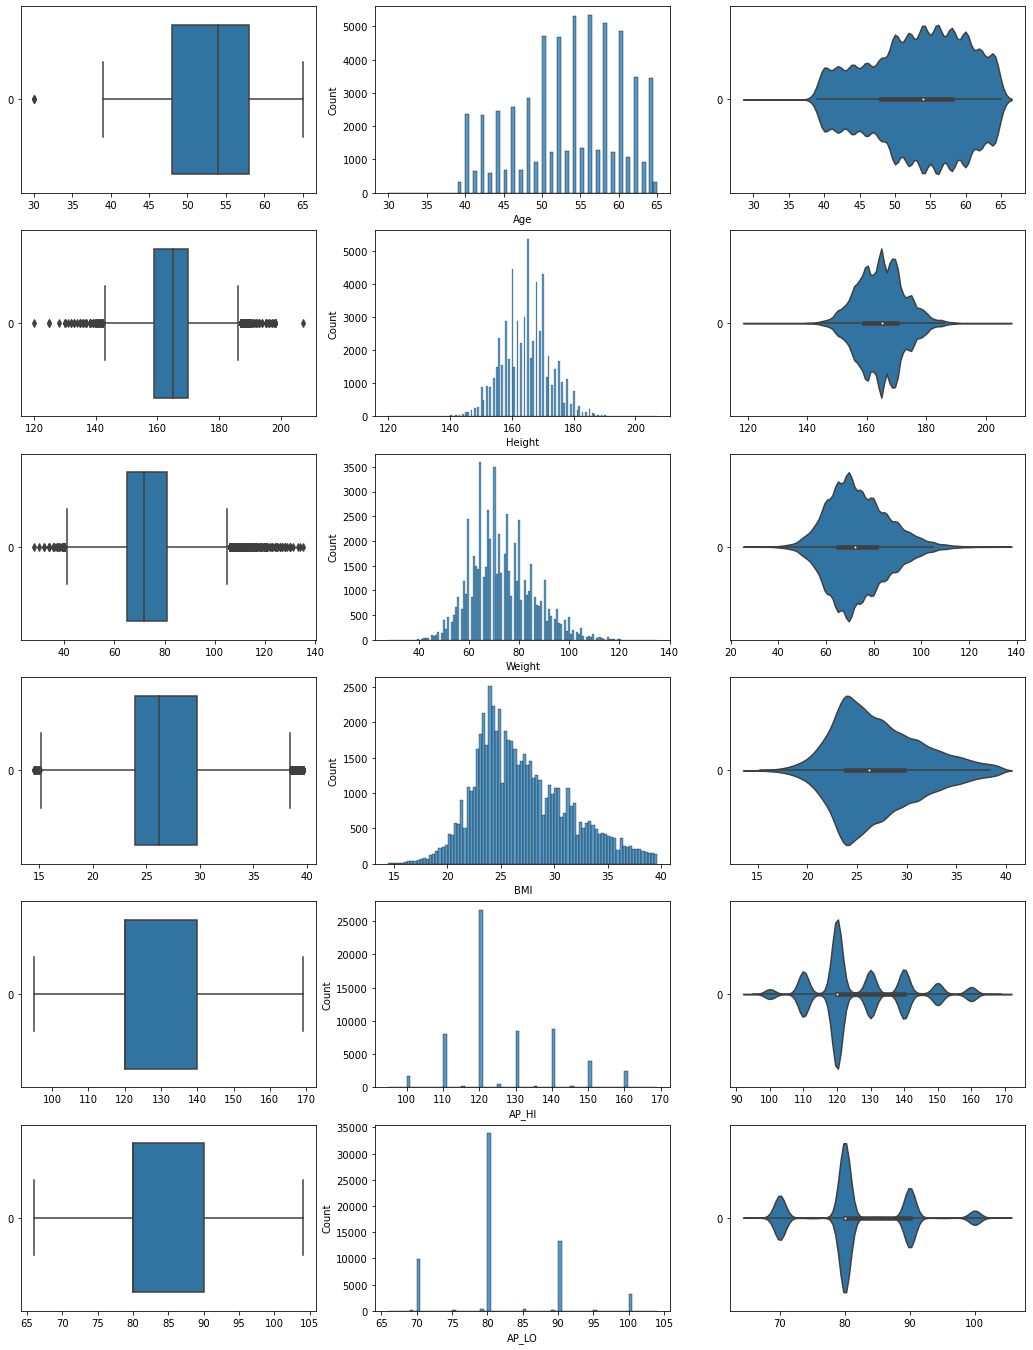

In [31]:
#visualization after cleaning box_whisker outlier
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

# Using Pairplot to detect and remove multi-variate outliers.

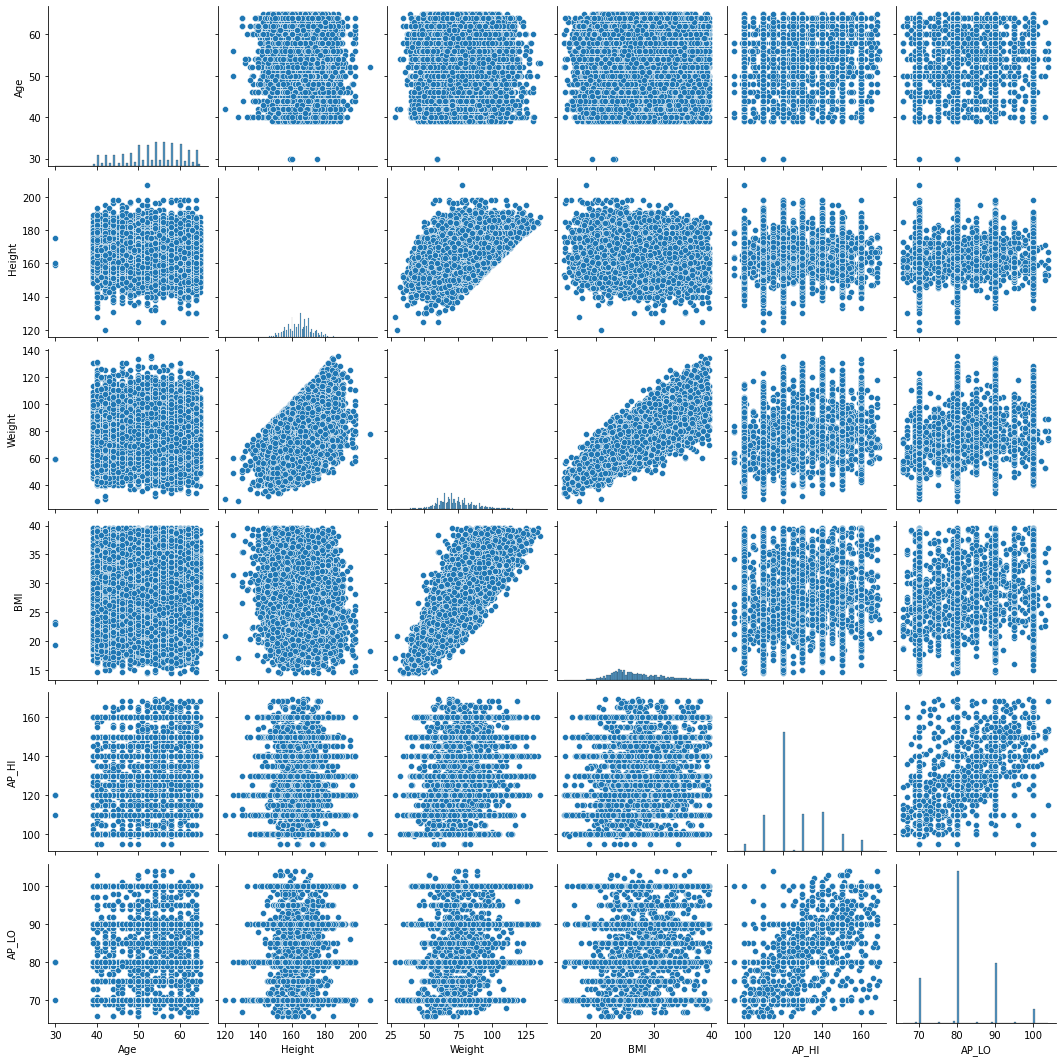

In [34]:
# Plot the Raw Data on 2D grids
sb.pairplot(num_DF)

In [37]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(num_DF)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

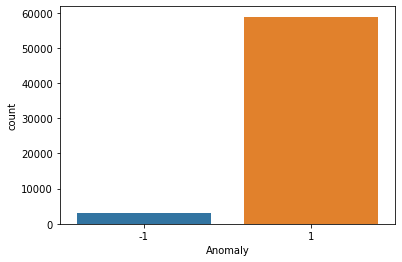

In [41]:
# Predict the Anomalies
labels = lof.fit_predict(num_DF)

# Append Labels to the Data
X_labeled = cardio_clean.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x = X_labeled["Anomaly"])

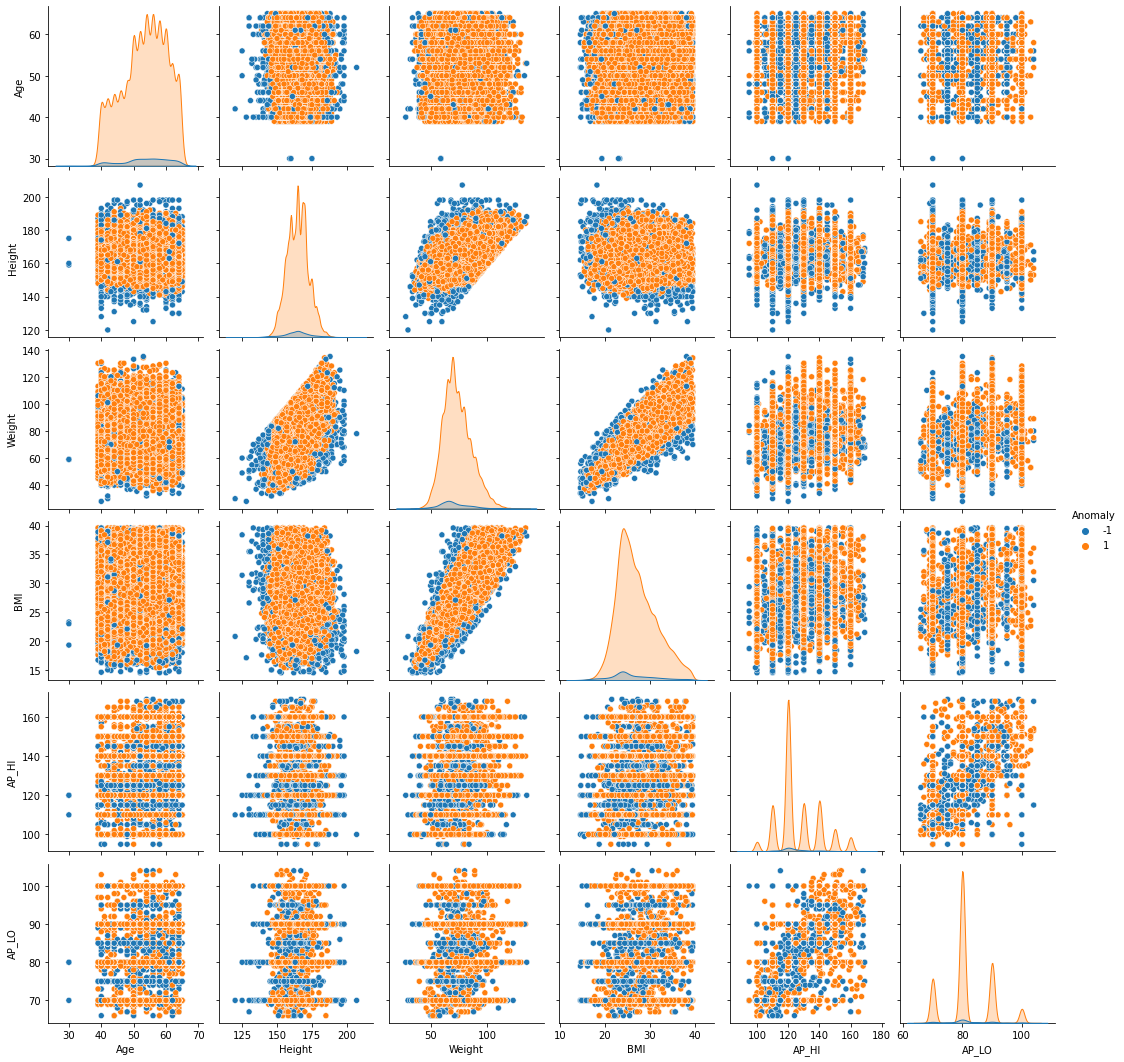

In [43]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = num_DF.columns.values, hue = "Anomaly")

In [44]:
num_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     61979 non-null  int64  
 1   Height  61979 non-null  int64  
 2   Weight  61979 non-null  float64
 3   BMI     61979 non-null  float64
 4   AP_HI   61979 non-null  int64  
 5   AP_LO   61979 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 5.3 MB


In [45]:
#drop anomaly from LOF
cardio_clean2 = X_labeled.drop(X_labeled[X_labeled.Anomaly == -1].index)
cardio_clean2 = cardio_clean2.drop(['Anomaly'], axis = 1)
cardio_clean2 = cardio_clean2.reset_index(drop=True)
cardio_clean2

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58875,99988,56,F,159,72.0,28.5,130,90,B,B,0,0,1,0
58876,99991,54,F,172,70.0,23.7,130,90,N,N,0,0,1,1
58877,99992,58,F,165,80.0,29.4,150,80,N,N,0,0,1,1
58878,99993,53,M,168,76.0,26.9,120,80,N,N,1,0,1,0


In [46]:
#Extract the numeric data
num_DF2 = cardio_clean2[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']]
num_DF2.info()
print()
print(num_DF2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     58880 non-null  int64  
 1   Height  58880 non-null  int64  
 2   Weight  58880 non-null  float64
 3   BMI     58880 non-null  float64
 4   AP_HI   58880 non-null  int64  
 5   AP_LO   58880 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.7 MB

       Age  Height  Weight   BMI  AP_HI  AP_LO
0       50     168    62.0  22.0    110     80
1       55     156    85.0  34.9    140     90
2       52     165    64.0  23.5    130     70
3       48     169    82.0  28.7    150    100
4       60     151    67.0  29.4    120     80
...    ...     ...     ...   ...    ...    ...
58875   56     159    72.0  28.5    130     90
58876   54     172    70.0  23.7    130     90
58877   58     165    80.0  29.4    150     80
58878   53     168    76.0  26.9    120     80
58879   56     170    72.0  

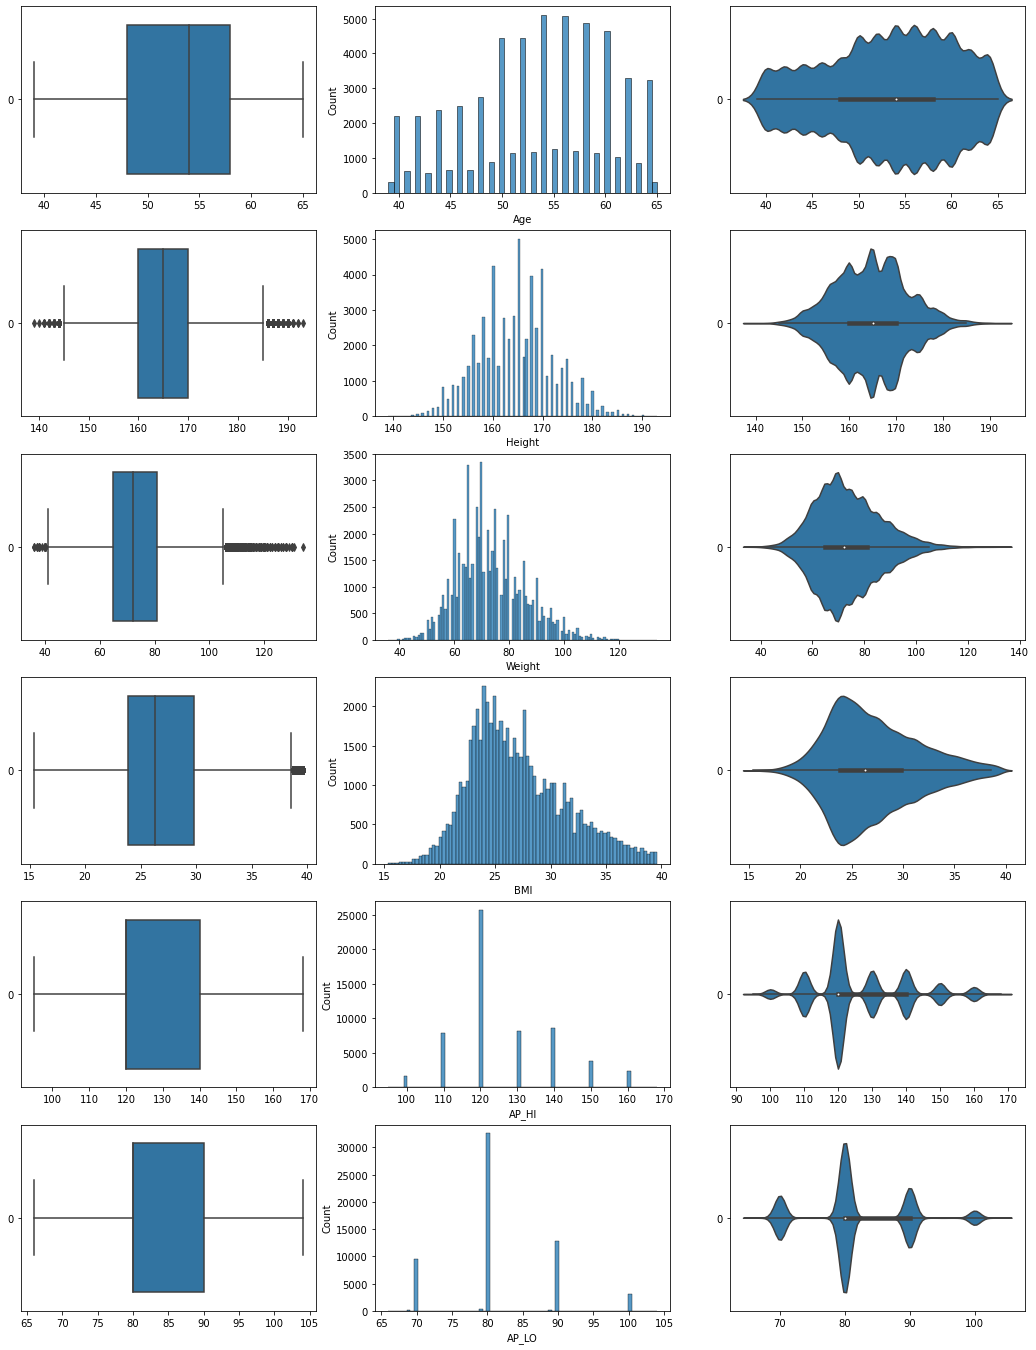

In [47]:
#vizualization after cleaning multi-variate
f, axes = mp.pyplot.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF2:
    sb.boxplot(data = num_DF2[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = num_DF2[var], ax = axes[count,1])
    sb.violinplot(data = num_DF2[var], orient = "h", ax = axes[count,2])
    count += 1

# EDA and Visualization ( After data cleaning )

In [48]:
print("Data type : ", type(cardio_clean2))
print("Data dims : ", cardio_clean2.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (58880, 14)


In [49]:
cardio_clean2.describe() 

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,49979.972130,53.358509,164.686974,73.357189,27.055973,126.173336,81.632592,0.088247,0.052395,0.804297,0.492544
std,28887.848429,6.730889,7.533603,12.468874,4.337957,13.716828,7.555582,0.283657,0.222824,0.396744,0.499949
min,0.000000,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,24908.000000,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50005.500000,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74956.250000,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
cardio_clean2.corr()

,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
id,1.000000,0.003707,-0.000524,0.001649,0.001567,0.007507,0.005195,-0.001571,-0.000950,0.003512,0.007887
Age,0.003707,1.000000,-0.099285,0.045014,0.107392,0.204634,0.146076,-0.050187,-0.029986,-0.009215,0.236037
Height,-0.000524,-0.099285,1.000000,0.386548,-0.168129,0.005661,0.021995,0.191807,0.097105,-0.012723,-0.017780
Weight,0.001649,0.045014,0.386548,1.000000,0.840210,0.233566,0.214359,0.084017,0.073763,-0.011357,0.157391
BMI,0.001567,0.107392,-0.168129,0.840210,1.000000,0.245227,0.215159,-0.023581,0.020781,-0.005238,0.177943
AP_HI,0.007507,0.204634,0.005661,0.233566,0.245227,1.000000,0.715613,0.026175,0.029719,0.003194,0.432843
AP_LO,0.005195,0.146076,0.021995,0.214359,0.215159,0.715613,1.000000,0.023394,0.032579,-0.000162,0.335679
Smoke,-0.001571,-0.050187,0.191807,0.084017,-0.023581,0.026175,0.023394,1.000000,0.344691,0.023977,-0.018115
Alco,-0.000950,-0.029986,0.097105,0.073763,0.020781,0.029719,0.032579,0.344691,1.000000,0.025887,-0.010291
Active,0.003512,-0.009215,-0.012723,-0.011357,-0.005238,0.003194,-0.000162,0.023977,0.025887,1.000000,-0.036683


In [51]:
cardio_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


## Numeric variables EDA and visulization ( After cleaning )

In [52]:
# get all cleaned numeric data
num_DF = pd.DataFrame(cardio_clean2[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
num_DF.head()

,Age,Height,Weight,BMI,AP_HI,AP_LO
0,50,168,62.0,22.0,110,80
1,55,156,85.0,34.9,140,90
2,52,165,64.0,23.5,130,70
3,48,169,82.0,28.7,150,100
4,60,151,67.0,29.4,120,80


In [53]:
num_DF.describe()

,Age,Height,Weight,BMI,AP_HI,AP_LO
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,53.358509,164.686974,73.357189,27.055973,126.173336,81.632592
std,6.730889,7.533603,12.468874,4.337957,13.716828,7.555582
min,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000
25%,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000
75%,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000
max,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000


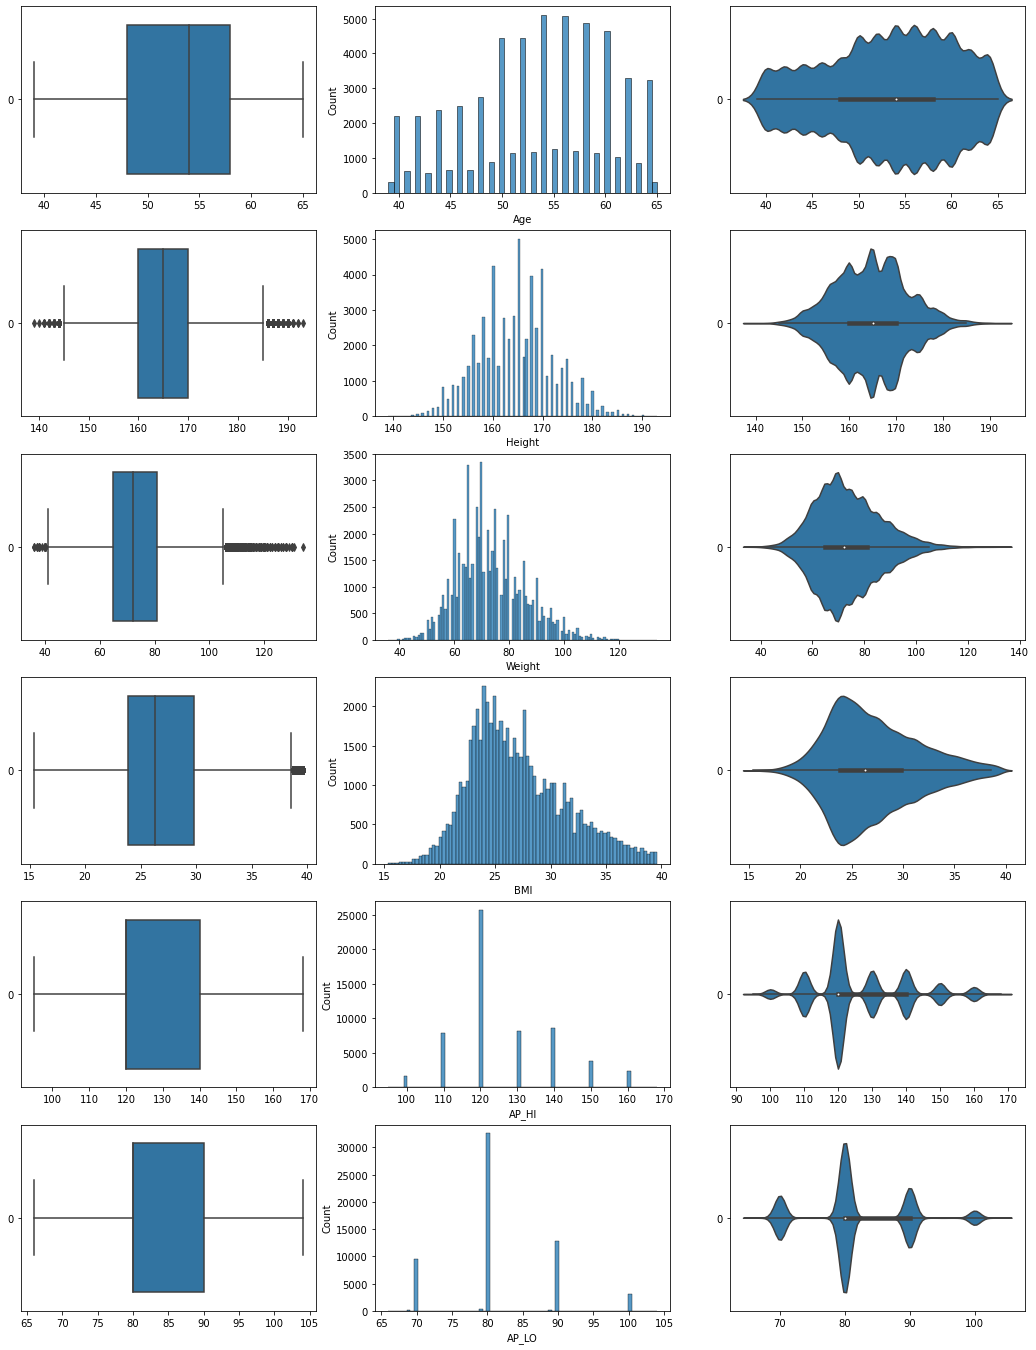

In [54]:
#visualization before data cleaning
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in num_DF:
    sb.boxplot(data = num_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_DF[var], ax = axes[count,1])
    sb.violinplot(data = num_DF[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

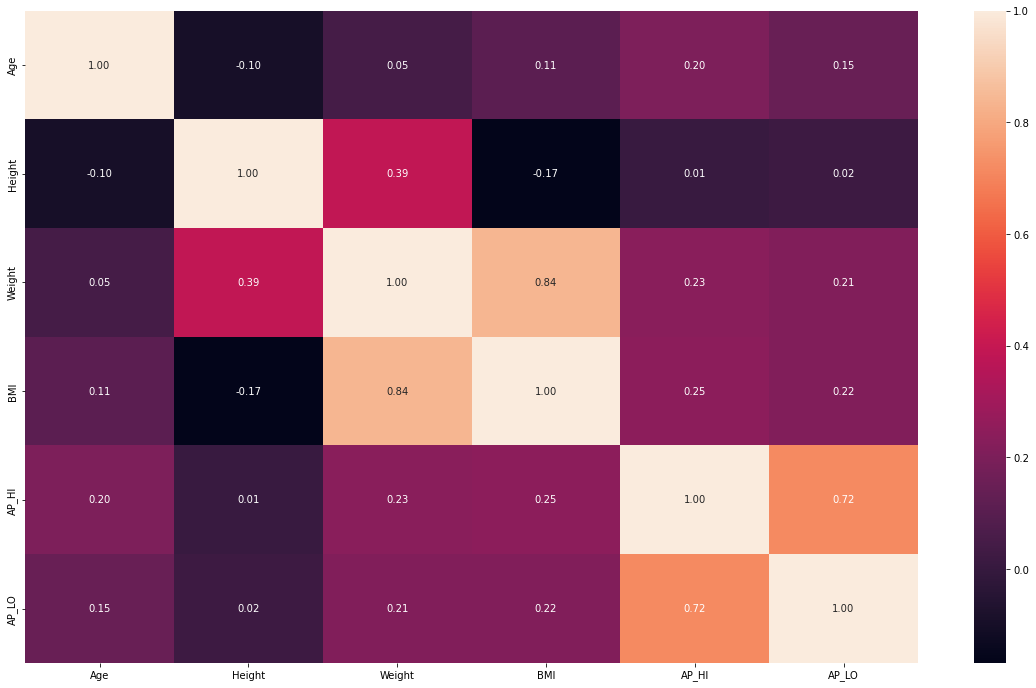

In [55]:
f = plt.figure(figsize=(20, 12))
sb.heatmap(num_DF.corr(), annot = True, fmt = ".2f")

In [56]:
num_DF.corr()

,Age,Height,Weight,BMI,AP_HI,AP_LO
Age,1.000000,-0.099285,0.045014,0.107392,0.204634,0.146076
Height,-0.099285,1.000000,0.386548,-0.168129,0.005661,0.021995
Weight,0.045014,0.386548,1.000000,0.840210,0.233566,0.214359
BMI,0.107392,-0.168129,0.840210,1.000000,0.245227,0.215159
AP_HI,0.204634,0.005661,0.233566,0.245227,1.000000,0.715613
AP_LO,0.146076,0.021995,0.214359,0.215159,0.715613,1.000000


In [57]:
num_DF.skew()

Age      -0.304538
Height    0.121216
Weight    0.533658
BMI       0.599574
AP_HI     0.690317
AP_LO     0.450659
dtype: float64

## Categorical variables EDA and Visualization ( After cleaning )

In [58]:
# categorical columns
cat_DF = pd.DataFrame(cardio_clean2[['Gender', 'Chol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio']])
cat_DF.head()

,Gender,Chol,Gluc,Smoke,Alco,Active,Cardio
0,M,N,N,0,0,1,0
1,F,H,N,0,0,1,1
2,F,H,N,0,0,0,1
3,M,N,N,0,0,1,1
4,F,B,B,0,0,0,0


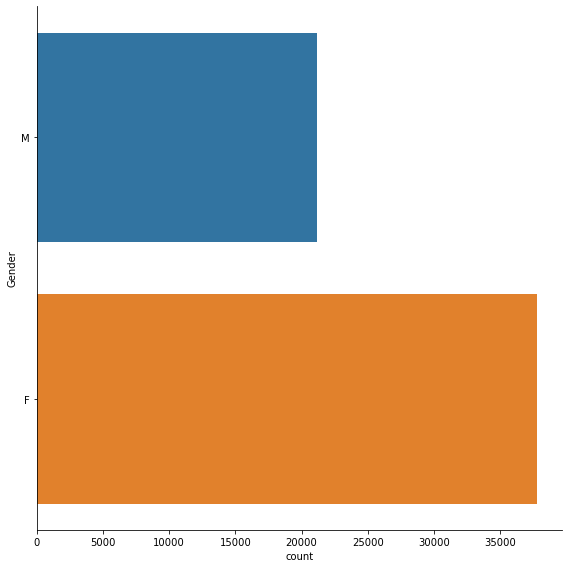

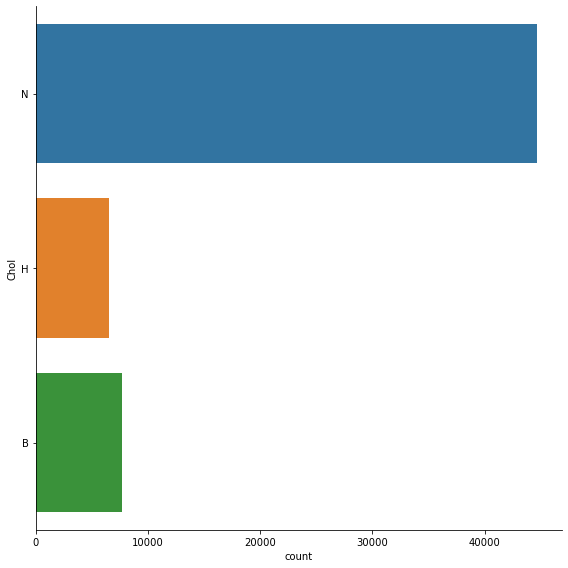

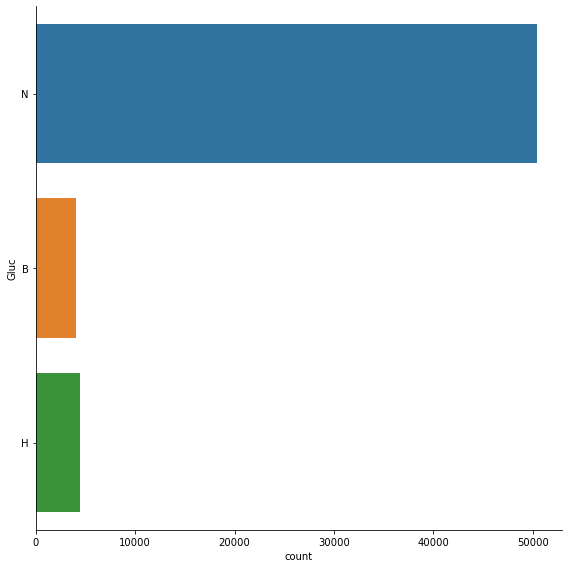

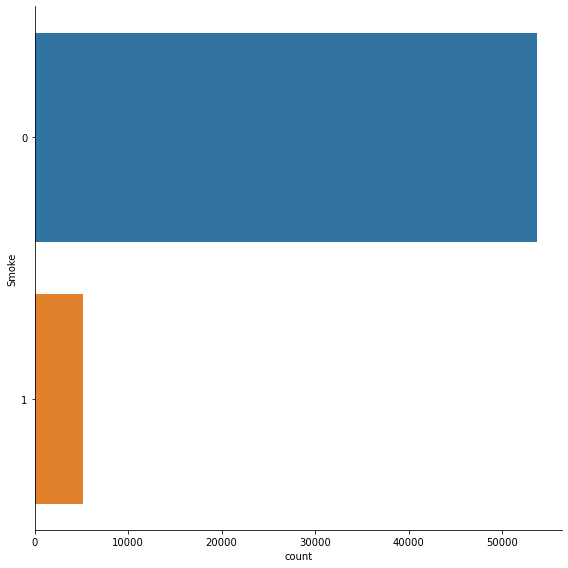

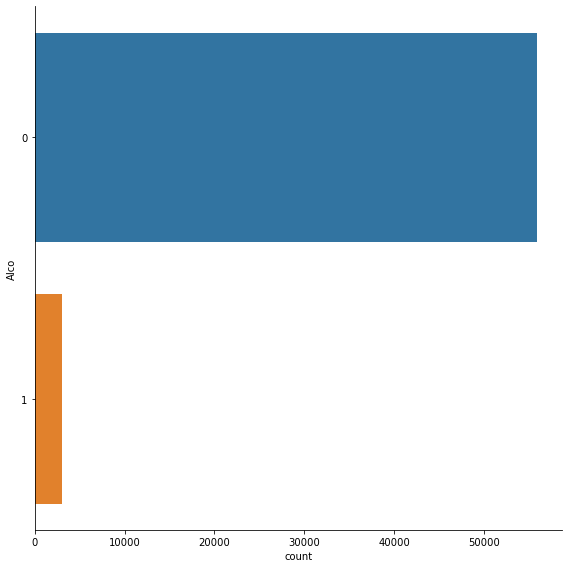

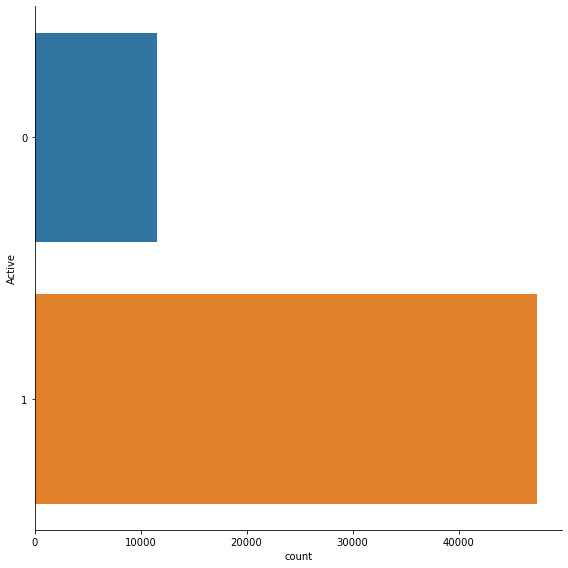

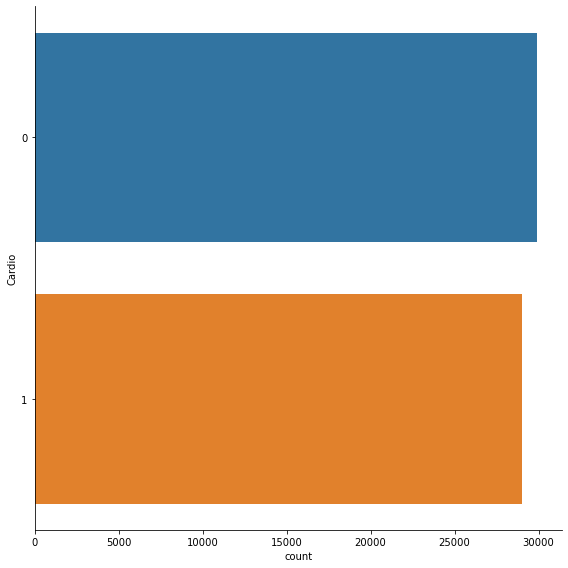

In [59]:
# cat plots
for var in cat_DF:
    sb.catplot(y = var, data = cat_DF, kind = "count", height = 8)

In [61]:
#change categorical to numeric
cat_DF['Chol']=cat_DF['Chol'].replace(['N','B','H'],[0,1,2]) 
cat_DF['Gluc']=cat_DF['Gluc'].replace(['N','B','H'],[0,1,2])
cat_DF['Gender']=cat_DF['Gender'].replace(['M','F'],[0,1])

<AxesSubplot:>

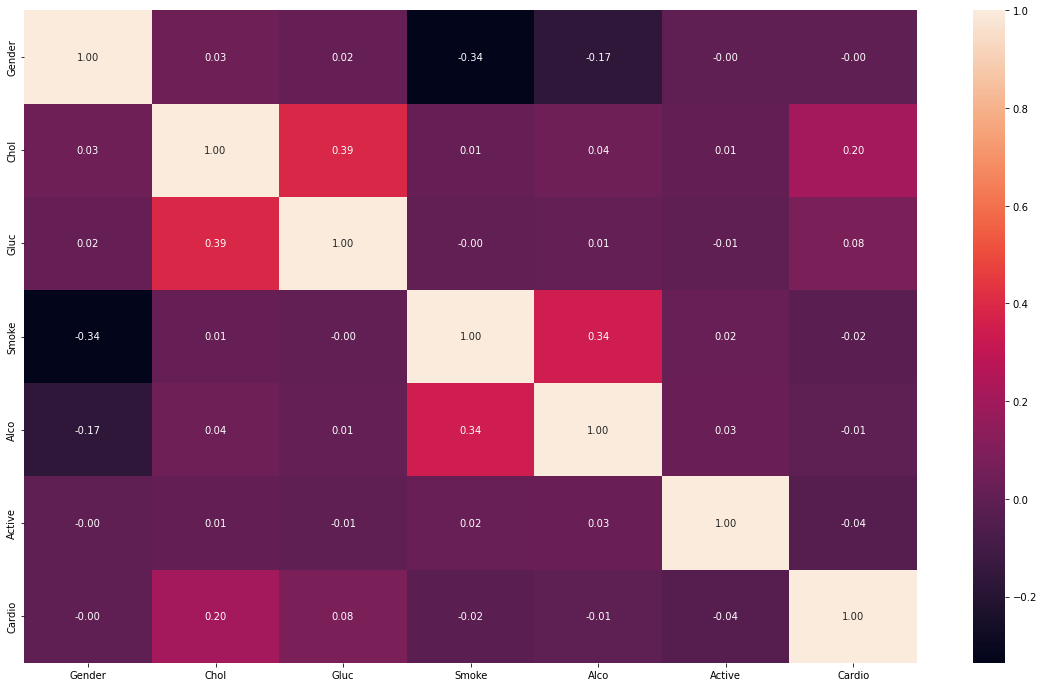

In [62]:
# using phi coefficient ( for categorical variables )
#heatmap for kendall corr for categorical 
variablesf = mp.pyplot.figure(figsize=(20, 12))
sb.heatmap(cat_DF.corr(method='kendall'), annot = True, fmt = ".2f")

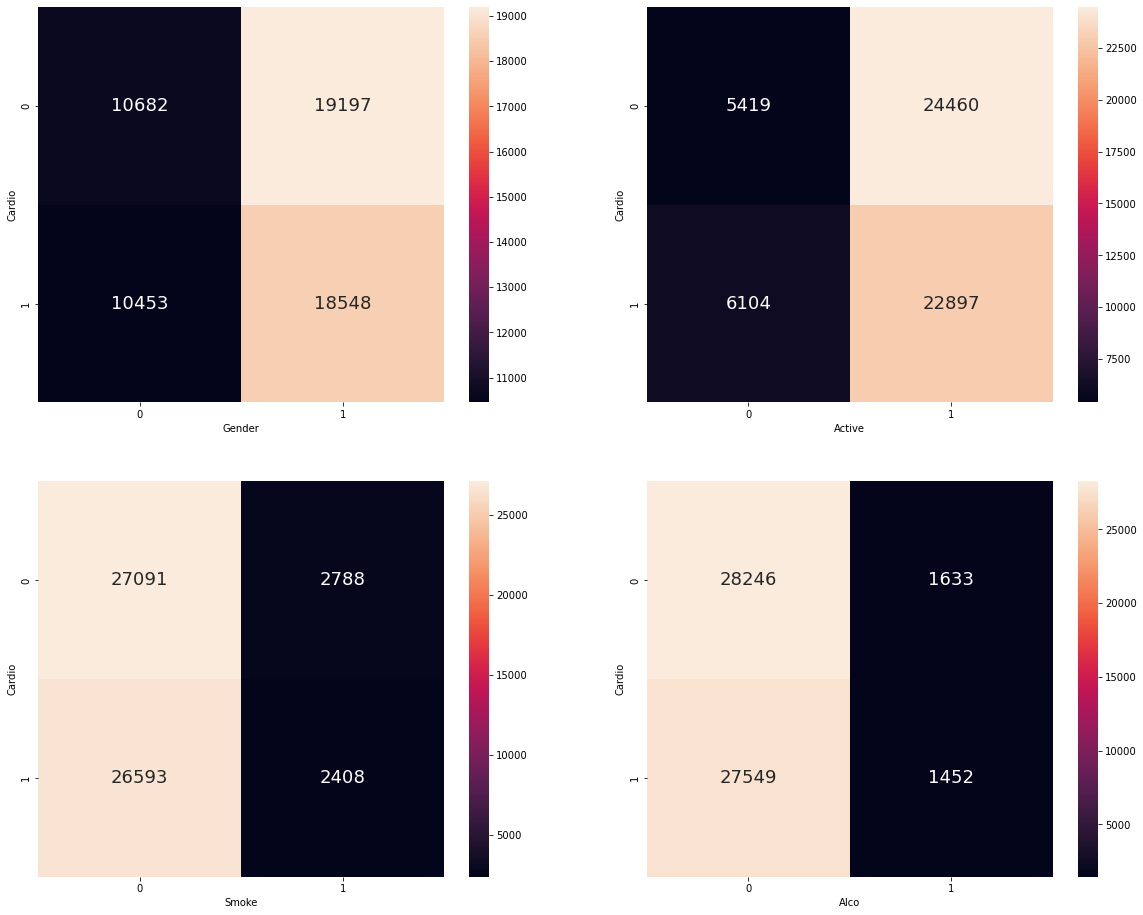

In [63]:
# looking at the binary variables distribution
f, axes = mp.pyplot.subplots(2, 2, figsize=(20, 16), )

cm_gender = confusion_matrix(cat_DF["Cardio"], cat_DF["Gender"])
cm_smoke = confusion_matrix(cat_DF["Cardio"], cat_DF["Smoke"])
cm_alco = confusion_matrix(cat_DF["Cardio"], cat_DF["Alco"])
cm_active = confusion_matrix(cat_DF["Cardio"], cat_DF["Active"])

sb.heatmap(cm_gender, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_active, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_smoke, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_alco, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])

count = 0
for ax in axes.flat:
    ax.set(ylabel = 'Cardio')
    if count == 0:
        ax.set(xlabel = 'Gender')
    elif count == 1:
        ax.set(xlabel = 'Active')
    elif count == 2:
        ax.set(xlabel = 'Smoke')
    elif count == 3:
        ax.set(xlabel = 'Alco')   
    count+=1

In [64]:
print("Percentage of Male with Cardio disease: ", round(100 * cm_gender[1][0]/(cm_gender[0][0] + cm_gender[1][0]),1))
print("Percentage of Female with Cardio disease: ", round(100 * cm_gender[1][1]/(cm_gender[0][1] + cm_gender[1][1]),1))
print()
print("Percentage of non-Active with Cardio disease: ", round(100 * cm_active[1][0]/(cm_active[0][0] + cm_active[1][0]),1))
print("Percentage of Active with Cardio disease: ", round(100 * cm_active[1][1]/(cm_active[0][1] + cm_active[1][1]),1))
print()
print("Percentage of non-Smoker with Cardio disease: ", round(100 * cm_smoke[1][0]/(cm_smoke[0][0] + cm_smoke[1][0]),1))
print("Percentage of Smoker with Cardio disease: ", round(100 * cm_smoke[1][1]/(cm_smoke[0][1] + cm_smoke[1][1]),1))
print()
print("Percentage of non-Alcohol with Cardio disease: ", round(100 * cm_alco[1][0]/(cm_alco[0][0] + cm_alco[1][0]),1))
print("Percentage of Alcohol with Cardio disease: ", round(100 * cm_alco[1][1]/(cm_alco[0][1] + cm_alco[1][1]),1))

Percentage of Male with Cardio disease:  49.5
Percentage of Female with Cardio disease:  49.1

Percentage of non-Active with Cardio disease:  53.0
Percentage of Active with Cardio disease:  48.3

Percentage of non-Smoker with Cardio disease:  49.5
Percentage of Smoker with Cardio disease:  46.3

Percentage of non-Alcohol with Cardio disease:  49.4
Percentage of Alcohol with Cardio disease:  47.1


In [76]:
# write to a new csv file with cleaned data
#cardio_clean2.to_csv('cardio_clean.csv', index=False) 

In [78]:
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [79]:
cardio_clean.info()
cardio_clean.describecribe()Da

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


,id,Age,Height,Weight,BMI,AP_HI,AP_LO,Smoke,Alco,Active,Cardio
count,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000,58880.000000
mean,49979.972130,53.358509,164.686974,73.357189,27.055973,126.173336,81.632592,0.088247,0.052395,0.804297,0.492544
std,28887.848429,6.730889,7.533603,12.468874,4.337957,13.716828,7.555582,0.283657,0.222824,0.396744,0.499949
min,0.000000,39.000000,139.000000,36.000000,15.400000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,24908.000000,48.000000,160.000000,65.000000,23.900000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50005.500000,54.000000,165.000000,72.000000,26.300000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74956.250000,58.000000,170.000000,81.000000,29.800000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,193.000000,134.000000,39.600000,168.000000,104.000000,1.000000,1.000000,1.000000,1.000000
